In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")



In [3]:
#df = pd.read_csv(r"C:\Users\Thinkpad\OneDrive\Documents\BI Project\ML_data.csv")
df = pd.read_excel(".\Capstone_Data.xlsx")
# Explore the dataset
print(df.head())
print(df.info())

       Date  Workload sum  Scheduled Hours  Planned Absences  \
0  1/1/2019             8             0.00              0.00   
1  1/2/2019         40804          8885.90           1195.23   
2  1/3/2019         42189          9656.08           1218.42   
3  1/4/2019         44384          8795.96           1269.42   
4  1/5/2019            11          4354.98            575.00   

   Unplanned Absences  Unpaid Absences  Actual Work Hours  \
0                0.00             0.00               0.00   
1              647.96           296.59            7042.71   
2              562.20           283.91            7875.46   
3              578.67           277.13            6947.87   
4              305.32           132.69            3474.66   

   National_Holiday_IND  Provincial_Holiday_IND  Impact_Day_FLG  Day_of_Week  \
0                     1                       0               0            3   
1                     0                       0               0            4   
2       

In [19]:
# Split the data into dependent and independent variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# x = df.drop('Workload sum', axis = 1)
# y = df.Scheduled Hours
scaler = StandardScaler()

# Seperate features and target
# x = df[['Actual Work Hours']]
x= scaler.fit_transform(df[['Scheduled Hours']])

# x = pd.stan

# y= df[['Unplanned Absences']]

y= scaler.fit_transform(df[['Unplanned Absences']])


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


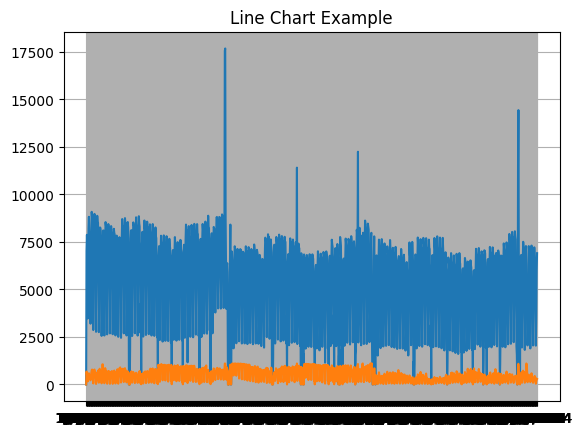

In [18]:
import matplotlib.pyplot as plt

# Sample data

# Plot the line chart
plt.plot(df['Date'], x, linestyle='-')

plt.plot(df['Date'], y, linestyle='-')

# Add labels and title
plt.title('Line Chart Example')

# Add grid
plt.grid(True)

# Show the plot
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)

In [21]:
#x_train.shape, y_train.shape, x_test.shape, y_test.shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((911, 1), (228, 1), (911,), (228,))

In [23]:
## Linear Regression Model:

In [25]:
# Initialize the Linear Regression model
from sklearn.datasets import make_regression
Regression = LinearRegression()

# Train the model
model1 = Regression.fit(x_train,y_train)

# Make predictions on the train set
y_trainpred2 = model1.predict(x_train)

# make prediction on test set
y_pred2 = model1.predict(x_test)


# Drop rows with missing values from both X and y

# x_cleaned = x.dropna()
x_cleaned = x
# y_cleaned = y[x.index.isin(x_cleaned.index)]
y_cleaned = y

# Fit the LinearRegression model with the cleaned data
regressor = LinearRegression()
regressor.fit(x_cleaned, y_cleaned)


# Evaluate the model

rmse1 = mean_squared_error(y_trainpred2, y_train, squared=False)
rmse2 = mean_squared_error(y_pred2, y_test, squared=False)
print('rmse on train set is',rmse1)
print('rmse on test set is', rmse2)

rmse on train set is 215.99919044620714
rmse on test set is 210.47948445375562


In [25]:
## Decision Tree Model:

In [26]:
# Initialize the Decision Tree model
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor

# Instantiate the imputer with a chosen strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data and transform it
x_imputed = imputer.fit_transform(x)

# Instantiate the DecisionTreeRegressor and fit it to the imputed data
regressor = DecisionTreeRegressor()
regressor.fit(x_imputed, y)


DecisionTreeRegressor()